<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [2]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [3]:
# Preprocess input data for Keras. 
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نرمال سازی مقادیر به مقدار بین 0 و 1 
</div>

In [4]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2314 (9.04 KB)
Trainable params: 2314 (9.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [8]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100


13/13 [==============================] - 1s 18ms/step - loss: 2.1948 - accuracy: 0.2875 - val_loss: 2.0067 - val_accuracy: 0.3800
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.9663 - accuracy: 0.4325 - val_loss: 1.8320 - val_accuracy: 0.4900
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 1.7952 - accuracy: 0.5225 - val_loss: 1.6758 - val_accuracy: 0.5900
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 1.6388 - accuracy: 0.6212 - val_loss: 1.5342 - val_accuracy: 0.6300
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 1.4939 - accuracy: 0.6812 - val_loss: 1.4008 - val_accuracy: 0.6750
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 1.3589 - accuracy: 0.7188 - val_loss: 1.2793 - val_accuracy: 0.7000
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 1.2360 - accuracy: 0.7425 - val_loss: 1.1725 - val_accuracy: 0.7350
Epoch 8/10

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

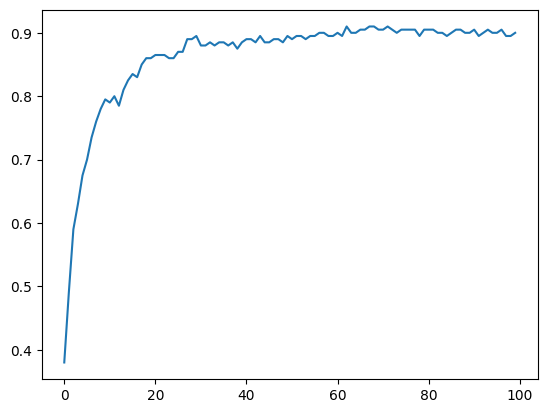

In [10]:
plt.plot(history.history['val_accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [11]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9150

Testing loss: 0.27, acc: 0.92%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");